# Classificação dos cogumelos

> * ***Integrantes:***
>   * Davi Mota Campos 12411BCC054
>   * Felipe Roza Bonetti 12011BCC032
>   * Guilherme Castilho Machado 12021BSI225
>   * Gustavo Melo do Carmo 11721BCC035
>   * Marcelo Prado Ribeiro 12021BCC012
>   * Miguel Borges de Rezende Costa 12111BCC019
>   * Tarick Tavares Prado Cruz 12111FIS216
>   * Tiago de Paula Alves 12011BCC040
>   * Vitor Santini Bessa 11821BCC010


> * Objetivo principal é: dado os atributos dos cogumelos identificar se ele é comestivel ou venenoso.

- Informações dos Atributos: (classes: comestível=e, venenoso=p)

    - **Forma do chapéu**: campanulado=b, cônico=c, convexo=x, achatado=f, com calo=k, deprimido=s
    - **Superfície do chapéu**: fibroso=f, sulcado=g, escamoso=y, liso=s
    - **Cor do chapéu**: marrom=n, amarelado=b, canela=c, cinza=g, verde=r, rosa=p, roxo=u, vermelho=e, branco=w, amarelo=y
    - **Hematomas**: machuca=t, não=f
    - **Odor**: amêndoa=a, anis=l, creosoto=c, peixe=y, podre=f, mofado=m, nenhum=n, pungente=p, picante=s
    - **Anexo das lamelas**: aderente=a, decrescente=d, livre=f, entalhado=n
    - **Espaçamento das lamelas**: fechado=c, aglomerado=w, distante=d
    - **Tamanho das lamelas**: largo=b, estreito=n
    - **Cor das lamelas**: preto=k, marrom=n, amarelado=b, chocolate=h, cinza=g, verde=r, laranja=o, rosa=p, roxo=u, vermelho=e, branco=w, amarelo=y
    - **Forma do estipe (talo)**: alargado=e, afilado=t
    - **Raiz do estipe**: bulboso=b, clavado=c, copado=u, igual=e, rizomorfo=z, enraizado=r, ausente=?
    - **Superfície do estipe acima do anel**: fibroso=f, escamoso=y, sedoso=k, liso=s
    - **Superfície do estipe abaixo do anel**: fibroso=f, escamoso=y, sedoso=k, liso=s
    - **Cor do estipe acima do anel**: marrom=n, amarelado=b, canela=c, cinza=g, laranja=o, rosa=p, vermelho=e, branco=w, amarelo=y
    - **Cor do estipe abaixo do anel**: marrom=n, amarelado=b, canela=c, cinza=g, laranja=o, rosa=p, vermelho=e, branco=w, amarelo=y
    - **Tipo de véu**: parcial=p, universal=u
    - **Cor do véu**: marrom=n, laranja=o, branco=w, amarelo=y
    - **Número de anéis**: nenhum=n, um=o, dois=t
    - **Tipo de anel**: teia=c, efêmero=e, alargado=f, grande=l, nenhum=n, pendente=p, envolvente=s, zona=z
    - **Cor do esporo**: preto=k, marrom=n, amarelado=b, chocolate=h, verde=r, laranja=o, roxo=u, branco=w, amarelo=y
    - **População**: abundante=a, agrupado=c, numeroso=n, disperso=s, vários=v, solitário=y
    - **Habitat**: gramados=g, folhas=l, campos=m, trilhas=p, urbano=u, lixo=w, florestas=d

> * Importar as bibliotecas necessárias


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Carregamento e Exploração dos Dados

In [2]:
#file_path = 'mushrooms.csv'
file_path = 'https://drive.google.com/uc?id=13eiAQjaPBPnK5zKE7DdhpuZX17mEgDc5'

# Carregar os dados usando pandas
mushroom_data = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
mushroom_data.head()

Primeiras linhas do dataset:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Pré-processamento dos Dados

> * label_encoder: Transforma valores categóricos (textos ou rótulos) em números inteiros

In [3]:
label_encoder = LabelEncoder()
data_encoded = mushroom_data.apply(lambda col: label_encoder.fit_transform(col))

# Visualizar as primeiras linhas dos dados codificados
print("\nPrimeiras linhas dos dados codificados:")
data_encoded.head()


Primeiras linhas dos dados codificados:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [4]:
# Descrição estatística dos dados codificados
print("\nDescrição estatística dos dados codificados:")
data_encoded.describe()


Descrição estatística dos dados codificados:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [5]:
# Exibir os valores únicos de cada coluna para entender a distribuição
print("\nValores únicos por coluna:")
for col in mushroom_data.columns:
    print(f"{col}: {mushroom_data[col].unique()}")


Valores únicos por coluna:
class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' 'b']
gill-color: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape: ['e' 't']
stalk-root: ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring: ['s' 'f' 'k' 'y']
stalk-surface-below-ring: ['s' 'f' 'y' 'k']
stalk-color-above-ring: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type: ['p']
veil-color: ['w' 'n' 'o' 'y']
ring-number: ['o' 't' 'n']
ring-type: ['p' 'e' 'l' 'f' 'n']
spore-print-color: ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population: ['s' 'n' 'a' 'v' 'y' 'c']
habitat: ['u' 'g' 'm' 'd' 'p' 'w' 'l']


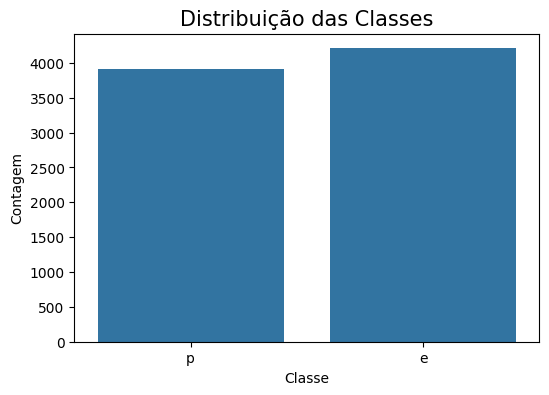

In [6]:
# Plotar a contagem das classes (comestível vs venenoso)
plt.figure(figsize=(6,4))
sns.countplot(x="class", data=mushroom_data)
plt.title("Distribuição das Classes", fontsize=15)
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()

## Transformaçao do modelo


In [7]:
# Separar as features e o target
X = data_encoded.drop('class', axis=1)
y = data_encoded['class'] # Coluna alvo para validar: Se eh venenoso ou nao

# Padronizar os dados para que todas as features tenham média 0 e variância 1 (verificar Necessidade)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Implementação do KNN Manual

In [8]:
def euclidean_distance(x1, x2):
    """
    Calcula a distância Euclidiana entre dois pontos.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_manual(X_train, y_train, X_test, k=3):
    """
    Implementação manual do algoritmo KNN.
    """
    predictions = []
    for x_test in X_test:
        # Calcular todas as distâncias entre o ponto de teste e os pontos de treino
        #distances = [euclidean_distance(x, x_test) for x in X_train] #demorado
        distances = np.linalg.norm(X_train - x_test, axis=1)

        # Obter os índices dos k vizinhos mais próximos
        k_indices = distances.argsort()[:k] # distances.argsort() retorna os índices dos valores em distances ordenados do menor para o maior, ou seja, do vizinho mais próximo ao mais distante.

        # Obter as classes dos k vizinhos mais próximos
        k_nearest_labels = y_train[k_indices]

        # Determinar a classe mais comum entre os vizinhos
        most_common = np.bincount(k_nearest_labels).argmax()
        predictions.append(most_common)
    return predictions

In [9]:
predictions = knn_manual(X_train, y_train.values, X_test, k=5)

# Calcular a acurácia do modelo manual
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia do modelo KNN: {accuracy * 100:.2f}%')

Acurácia do modelo KNN: 100.00%


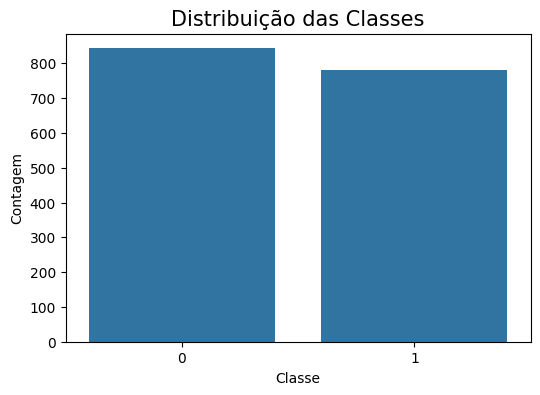

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x=predictions)
plt.title("Distribuição das Classes", fontsize=15)
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()

## Melhor Valor de K

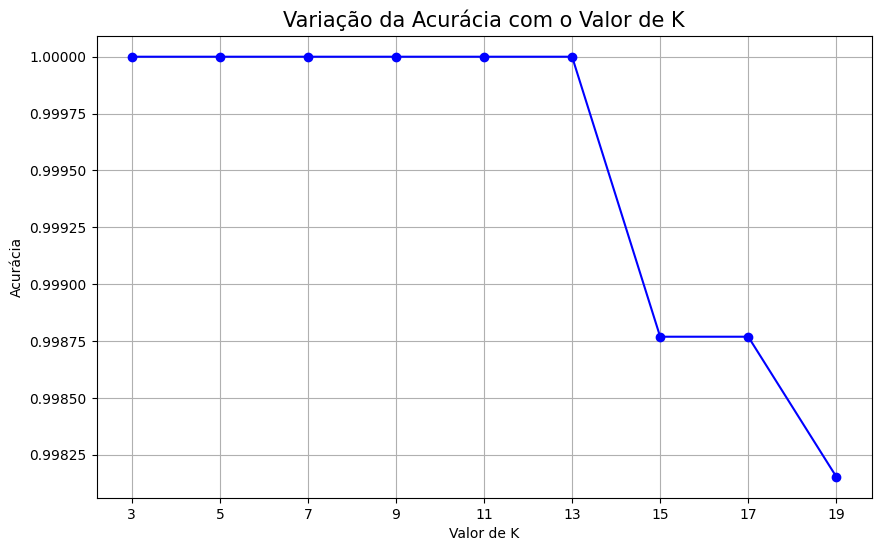


Melhor valor de K: 3 com acurácia de 100.00%


In [11]:
def avaliar_k(X_train, y_train, X_test, y_test, k_values):
    """
    Avalia diferentes valores de k e retorna a acurácia correspondente.
    """
    accuracies = []
    for k in k_values:
        # Usar o KNN manual para prever os rótulos do conjunto de teste
        preds = knn_manual(X_train, y_train.values, X_test, k=k)

        # Calcular a acurácia e armazenar
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
    return accuracies

# Definir os valores de k a serem testados
k_values = range(3, 21, 2)

# Avaliar a acurácia para cada valor de k
accuracies = avaliar_k(X_train, y_train, X_test, y_test, k_values)

# Plotar o gráfico de acurácia por valor de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title('Variação da Acurácia com o Valor de K', fontsize=15)
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Encontrar o melhor valor de k
melhor_k = k_values[np.argmax(accuracies)]
melhor_acuracia = max(accuracies)
print(f"\nMelhor valor de K: {melhor_k} com acurácia de {melhor_acuracia * 100:.2f}%")

In [12]:
cm = confusion_matrix(y_test, predictions)
print("Matriz de Confusão:")
print(cm)

Matriz de Confusão:
[[843   0]
 [  0 782]]
